# 回归

## 线性回归

### 优点：
容易理解，计算不复杂

### 缺点：
对非线性数据拟合差

### 适用数据类型：
数值型(定量)、标称型(描述对象的特征,定性的，二元属性，序数属性)

### 方法步骤：
(1) 收集数据：采用任意方法收集数据。  
(2) 准备数据：回归需要数值型数据，标称型数据将被转成二值型数据。  
(3) 分析数据：绘出数据的可视化二维图将有助于对数据做出理解和分析，在采用缩减法
求得新回归系数之后，可以将新拟合线绘在图上作为对比。  
(4) 训练算法：找到回归系数。  
(5) 测试算法：使用R2或者预测值和数据的拟合度，来分析模型的效果。  
(6) 使用算法：使用回归，可以在给定输入的时候预测出一个数值，这是对分类方法的提
升，因为这样可以预测连续型数据而不仅仅是离散的类别标签。

假定样本独立：联合概率 = p1 * p2 边缘概率乘积 
假定独立同分布  
$\epsilon$，误差正态分布，误差是各种叠加，中心极限定理

泛化性度量：根均方误差RMS = $\sqrt{2E(w∗)/N)}$ 相同规模和单位进行比较  
最小二乘法是最大似然的一种特殊情形。最大似然通病：过拟合  
问题复杂，模型也要复杂。贝叶斯模型，参数的有效数量会跟据数据集的规模进行调节

### 输入： 
1. quantitative inputs;  
2. transformations of quantitative inputs, such as log, square-root or square;  
3. basis expansions, such as $X_{2} = X_{1}^{2}, X_{3} = X_{1}^{3}$, leading to a polynomial representation;  
4. numeric or “dummy” coding of the levels of qualitative inputs  
5. interactions between variables, for example, $X3 = X1 · X2$.  
$(x_{i}, y_{i})$满足独立随机，或(x->y),条件独立也行

残差平方和residual sum of squares： $$RSS(\beta) =\sum_{i=1}^{N}(y_i − f(x_i))^2 = \sum_{i=1}^{N}(y_i −\beta_0- f(x_i))^2$$

$$RSS(\beta) = (y − X\beta)^T(y − X\beta).$$

对$\beta$求导：$$\frac{\partial RSS}{\partial β} = −2X^T(y − X\beta)$$

假设$X$列满秩，一列一列向量线性无关，特征向量线性无关，那么$X^TX$，是正定的，令$X^T(y − X\beta)=0$，可以解得：$$\hat{β} = (X^TX)^{−1}X^Ty$$

$$\hat{y}=X\hat{\beta}=X(X^TX)^{−1}X^Ty$$

矩阵mXn,列满秩=n，行满秩=m

偏置w0补偿了目标值的平均值（在训练集上的）与基函数的值的平均值的加权求和之间的差

## 局部加权回归
控制附近有多少点参与回归，k越小，图形越尖，附近点权重小，参与回归少
$$J_\theta = \frac{1}{2}\sum_{i=1}^{N}W_i(y_i − f(x_i))^2$$ $$\hat{w} = (X^TWX)^{−1}X^TWy$$ 其中$W_i$选择高斯核：$$w(i,i) = \exp{\frac{(x^{(i)}-x)^2}{-2k^2}}$$ 预测值偏离数据越大，$w(i,i)$趋于0，J越小，样本数据附近的值的权重更大，促使去拟合附近的点，呈现曲线

## Ridge
L2正则化，$\lambda$越小，最小化时，$W_i$变大，模型容易过拟合。使用时，对不同的数据，需要标准化$$\hat{\theta} = (X^TX+\lambda I)^{−1}X^Ty$$

## Lasso
L1 正则，让参数矩阵稀疏，特征选择。数据需要标准化
L0是向量中非0的总个数

## logistic

## Regression 代码

In [3]:
from numpy import *

In [5]:
def loadDataSet(filename):
    numFeat = len(open(filename).readline().split('\t')) - 1
    dataMat, labelMat = [], []
    with open(filename) as f:
        for line in f.readlines():
            L = []
            curLine = line.split('\t')
            for i in range(numFeat):
                L.append(float(curLine[i]))
            dataMat.append(L)
            labelMat.append(float(curLine[-1]))
    return dataMat, labelMat
                

In [6]:
def standRegres(x, y):
    xMat, yMat = mat(x), mat(y).T
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.:
        print ('the matrix is singular')  # 矩阵是奇异的
        return 
    ws = xTx.I * (xMat.T * yMat)
    return ws
        

In [14]:
dataX, dataY = loadDataSet('ex0.txt')

In [22]:
xMat, yMat = mat(dataX), mat(dataY)

In [16]:
ws = standRegres(dataX, dataY)

In [19]:
ws

matrix([[3.00774324],
        [1.69532264]])

In [68]:
yHat[:10]

matrix([[3.12257084],
        [3.73301922],
        [4.69582855],
        [4.25946098],
        [4.67099547],
        [3.89977285],
        [3.65007895],
        [3.06514517],
        [3.23286683],
        [3.24221654]])

In [65]:
xCopy = xMat.copy()

In [66]:
xCopy.sort(0)

In [70]:
yHat = xCopy * ws

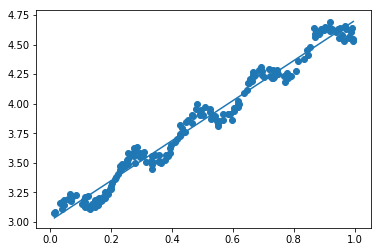

In [71]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])
ax.plot(xCopy[:,1], yHat)
plt.show()

In [72]:
yHat = xMat * ws

In [75]:
corrcoef(yHat.T, yMat)  #行向量yHat.shape:(200, 1) yMat.shape:(1, 200)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

In [78]:
# 对角线是自身，相关系数是0.98等

### 局部加权
缺点：增加计算量
$$w(i,i) = \exp{\frac{(x^{(i)}-x)^2}{-2k^2}}$$

In [82]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat, yMat = mat(xArr), mat(yArr).T
    m = shape(xMat)[0]
    weight = mat(eye(m))
    for j in range(m):
        diffmat = testPoint - xMat[j,:]  # 行向量相减
        weight[j, j] = exp(diffmat * diffmat.T / (-2.0 * k**2))
    xTx = xMat.T * (weight * xMat)
    if linalg.det(xTx) == 0.:
        print('it is signal matrix')
        return
    ws = xTx.I * (xMat.T * weight * yMat)
    return testPoint * ws

In [83]:
def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [84]:
xArr, yArr = loadDataSet('ex0.txt')
yHat = lwlrTest(xArr, xArr, yArr, 0.003)

In [90]:
xMat = mat(xArr)
xMat[:4]

matrix([[1.      , 0.067732],
        [1.      , 0.42781 ],
        [1.      , 0.995731],
        [1.      , 0.738336]])

In [91]:
strInd = xMat[:,1].argsort(0)
strInd[:5]

matrix([[151],
        [ 24],
        [  7],
        [114],
        [ 26]], dtype=int64)

In [96]:
xSort = xMat[strInd][:,0,:]
xSort[:3]

matrix([[1.      , 0.014855],
        [1.      , 0.015371],
        [1.      , 0.033859]])

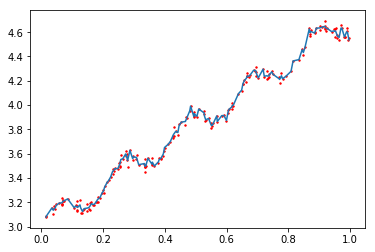

In [99]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1], yHat[strInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0], s=2, c='r')
plt.show()

### 预测鲍鱼年龄

In [100]:
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr)**2).sum()

In [7]:
abX, abY = loadDataSet('abalone.txt')

In [103]:
yHat01 = lwlrTest(abX[:99], abX[:99], abY[:99], 0.1)
yHat1 = lwlrTest(abX[:99], abX[:99], abY[:99], 1)
yHat10 = lwlrTest(abX[:99], abX[:99], abY[:99], 10)

In [104]:
rss01 = rssError(abY[:99], yHat01)
rss1 = rssError(abY[:99], yHat1)
rss10 = rssError(abY[:99], yHat10)
print(rss01, rss1, rss10)

56.79057224873831 429.89056186979974 549.1181708827622


In [109]:
ws = standRegres(abX[:99], abY[:99])
yHat = mat(abX[:99])*ws
rss = rssError(abY[:99], yHat.T.A)
print(rss)

551.0449986947922


## 岭回归
特征数多于样本数，L2正则，缩减不重要的参数，因为对于每个$W_i$使用的$\lambda$都行相同，所以数据需要标准化
$$\hat{w} = (X^TX + \lambda I)^{-1}X^Ty$$

In [1]:
def ridgeRegres(xMat, yMat, lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + lam * eye(shape(xMat)[1])  # xMat是行向量
    if linalg.det(denom) == 0.:
        print('the matrix is signal')
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

#### 数据标准化

In [2]:
def ridgeTest(xArr, yArr):
    xMat, yMat = mat(xArr), mat(yArr).T
    yMean = mean(yMat,0)
    yHat = yMat - yMean
    xMean = mean(xMat,0)
    xVar = var(xMat, 0)
    xMat = (xMat -xMean)/xVar
    numTest = 30
    wMat = zeros((numTest, shape(xMat)[1]))
    for i in range(numTest):
        ws = ridgeRegres(xMat, yMat, exp(i-10))
        wMat[i,:] = ws.T
    return wMat

In [8]:
abX, abY = loadDataSet('abalone.txt')

In [16]:
ridgeWeights = ridgeTest(abX, abY)
ridgeWeights[:5]

array([[ 0.04304419, -0.02274163,  0.13214088,  0.02075182,  2.22403745,
        -0.99895298, -0.11725424,  0.16622922],
       [ 0.04304419, -0.02274164,  0.13214088,  0.02075182,  2.22403626,
        -0.99895275, -0.11725417,  0.16622934],
       [ 0.04304419, -0.02274164,  0.13214088,  0.02075182,  2.22403305,
        -0.99895211, -0.117254  ,  0.16622966],
       [ 0.04304417, -0.02274166,  0.1321409 ,  0.02075182,  2.22402431,
        -0.99895038, -0.11725354,  0.16623052],
       [ 0.04304413, -0.02274171,  0.13214096,  0.02075183,  2.22400054,
        -0.99894568, -0.11725227,  0.16623286]])

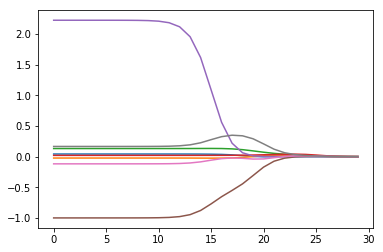

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.show()

### 前向逐步回归代替Lasso

In [ ]:
# def stageWise(xArr, yArr, eps=0.01, numIt= 100):
#     xMat, yMat = mat(xArr), mat(yArr).T
#     yMean = mean(yMat, 0)
#     yMat = yMat - yMean
#     xMat = regularize(xMat)
#     m, n = shape(xMat)
#     returnMat = zeros((numIt, n))
#     ws, wsTest, wsMax = zeros((n,1)), ws.copy(), ws.copy()
#     for i in range(numIt):
#         print ws.T
#     lowestError = inf
#     for j in range(n):
#         for sign in [-1,1]:
#             wsTest = ws.copy()
#             wsTest[j] += eps*sign
            
        

### 期望损失 = 偏差^2 + 方差 +噪声